In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,10)})


In [2]:
import random
random.seed(101)

Loading data

In [3]:
data=pd.read_csv("/kaggle/input/titanic-dataset/titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dict_live = {
    0: "Died",
    1: "Survived"
}

dict_sex= {
    "male" : 0,
    "female" : 1
}

data['Bsex']=data['Sex'].apply(lambda x : dict_sex[x])

features = data[['Pclass','Bsex']].to_numpy()

labels = data['Survived'].to_numpy()

Splitting the data

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=0)


Multi-layer perceptron

Activation function and derivation

In [8]:
#sigmoid

def sigmoid(x,derivative=False):
    if(derivative==True):
        f=1/(1+np.exp(-x)) + (1- 1/(1+np.exp(-x)))
    else:
        f=1/(1+np.exp(-x))
        
    return f

#relu
def ReLu(x,derivative=False):
    if(derivative==True):
        f=np.heaviside(x,1)
        
    else :
        f= np.maximum(x,0)
    return f

Training the model

In [13]:
def train_ANN(xtrain,ytrain , h1_units =4, h2_units=4 , learning_rate = 0.0015):
    
    random.seed(101)
    
    #hidden layer 1
    w1=2*np.random.rand(h1_units,X_train.shape[1])
    b1= np.random.rand(h1_units)
    
    #hidden layer 2
    w2=2*np.random.rand(h2_units , h1_units)
    b2= np.random.rand(h2_units)
    
    #output layer
    w_out=2*np.random.rand(h2_units)
    b_out= np.random.rand(1)
    
    loss = []
    vec_y=[]
    
    for i in range(0, X_train.shape[0]):
        x_data=X_train[i]
        
        #2 Feed forward
        h1 = ReLu(np.dot(w1,x_data)+b1) #hidden layer 1 output
        h2 = ReLu(np.dot(w2,h1)+b2)     #hidden layer 2 output
        y = sigmoid(np.dot(w_out,h2)+b_out) # output of output layer
        
        #3. Backpropagate
        delta_out = (y-y_train[i]) * (sigmoid(y,derivative=True))
        delta_2 = delta_out * w_out * (ReLu(h2,derivative=True))
        delta_1 = np.dot(delta_2,w2) * (ReLu(h1,derivative=True))
        
        #4 Gradient Descent
        w_out=w_out - learning_rate * delta_out * h2
        b_out= b_out -learning_rate * delta_out
        
        #Hidden layer 2
        w2=w2-learning_rate * np.kron(delta_2,h1).reshape(h2_units,h1_units)
        b2= b2 - learning_rate * delta_2
        
        #Hidden layer 1
        w1 = w1 - learning_rate * np.kron(delta_1,x_data).reshape(h1_units,x_data.shape[0])
        b1 = b1 - learning_rate * delta_1
        
        #cost
        loss.append((1/2) * ((y-y_train[i]) **2))
        vec_y.append(y[0])
        
    batch_loss=[]
    for i in range(0,10):
        loss_avg=0
        for m in range(0,60):
            loss_avg+= vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
        
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title("Average loss by epoch", fontsize=20)
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.show()
    
    return w1,b1,w2,b2,w_out,b_out,loss

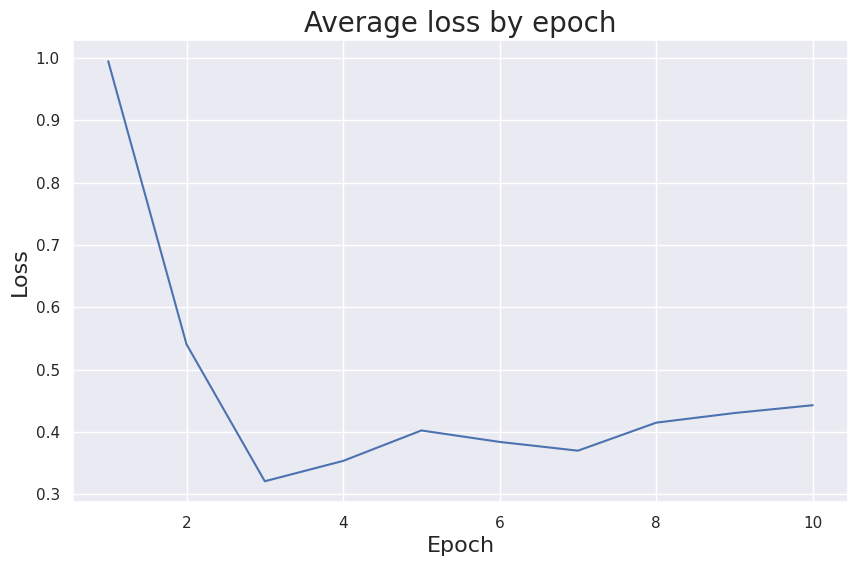

In [14]:
w1,b1,w2,b2,w_out,b_out,loss=train_ANN(X_train,y_train)

Testing Model

In [19]:
def ANNPredict(X_test,w1,b1,w2,b2,w_out,b_out):
    pred=[]
    
    for i in range(0,X_test.shape[0]):
        x=X_train[i]
        
        #2 Feed forward
        z1 = ReLu(np.dot(w1,x)+b1) #hidden layer 1 output
        z2 = ReLu(np.dot(w2,z1)+b2)     #hidden layer 2 output
        y = sigmoid(np.dot(w_out,z2)+b_out) # output of output layer
        
        pred.append(np.heaviside(y-0.5 , 1)[0])
        
    return np.array(pred)

In [21]:
predictions=ANNPredict(X_test,w1,b1,w2,b2,w_out,b_out)

In [22]:
predictions

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1.

In [23]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,predictions)

In [25]:
df_cm=pd.DataFrame(cm, index=[dict_live[i] for i in range(0,2)],
                   columns = [dict_live[i] for i in range(0,2)])
df_cm

,Died,Survived
Died,82,86
Survived,54,46


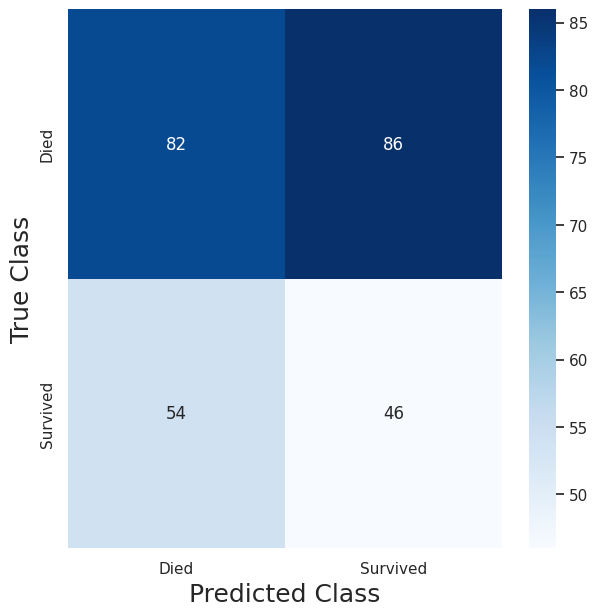

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cm,annot=True,cmap=plt.cm.Blues,fmt= 'g')
plt.xlabel("Predicted Class",fontsize=18)
plt.ylabel("True Class",fontsize=18)
plt.show()